# <span style="color:blue">  Numerical exercises 5</span> Igor Vasiljevic 11191A

## The Metropolis algorithm is a Monte Carlo method used to generate samples from a probability distribution. The main steps are:
## Define a probability distribution what we want to sample. Choose a risonable (can be even not risonable, but the converge time and the coding time will increase)(can be even random with low prior) initial state. Propose a new state with moves (small pertubation). Calculate the acceptance probability, evaluate the ratio of the target distribution's values between the proposed and current state. Generate a random number with uniform distribution between 0 and 1, and if this number is less then the acceptance probability then the moves is accepted and we get a new state to start moving again; othewise the system remains in the current state and try again.

## In the following i use Metropolis Algorithm with both Random Walk and Gaussian moves with acceptance closly to 50% for the model of Hydrogen Atom

## A Random Walk it is a good way to do moves randomly in attempt to sample a probability distribution;
## The random walk over time tend to spread and leading diffusion-like behavior (the mean square grows linearly with the number of steps)

In [132]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

M=1000000          # Total number of throws
N=100              # Number of blocks
L=int(M/N)
x1 = np.arange(N)
x1*=L # Number of throws = block * (Number of throws in each block)

plt.rcParams.update({'font.size': 20})

## Random Walk move

In [133]:
dataRW = pd.read_csv('../Esercizio5/datiRW.dat', sep='\s+', header=None, names=['values100', 'err100', 'values210','err210'])

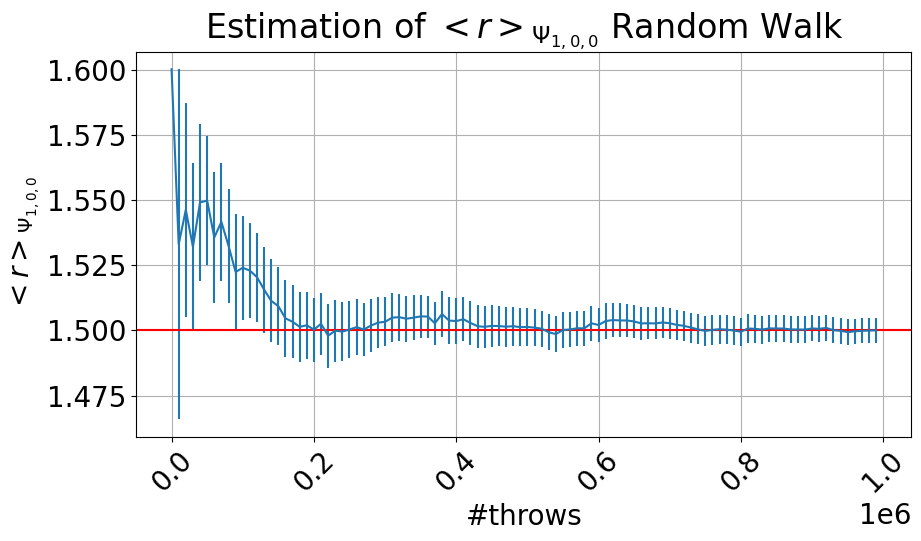

In [134]:
plt.errorbar(x1,dataRW["values100"],yerr=dataRW["err100"])
plt.rcParams["figure.figsize"]=(10,5)
plt.axhline(y=1.5, color='r', linestyle='-') # Model value
plt.title('Estimation of $<r>_{\Psi_{1,0,0}}$ Random Walk')
plt.xticks(rotation = 45)
plt.xlabel('#throws')
plt.ylabel('$<r>_{\Psi_{1,0,0}}$')
plt.grid(True)
plt.show()

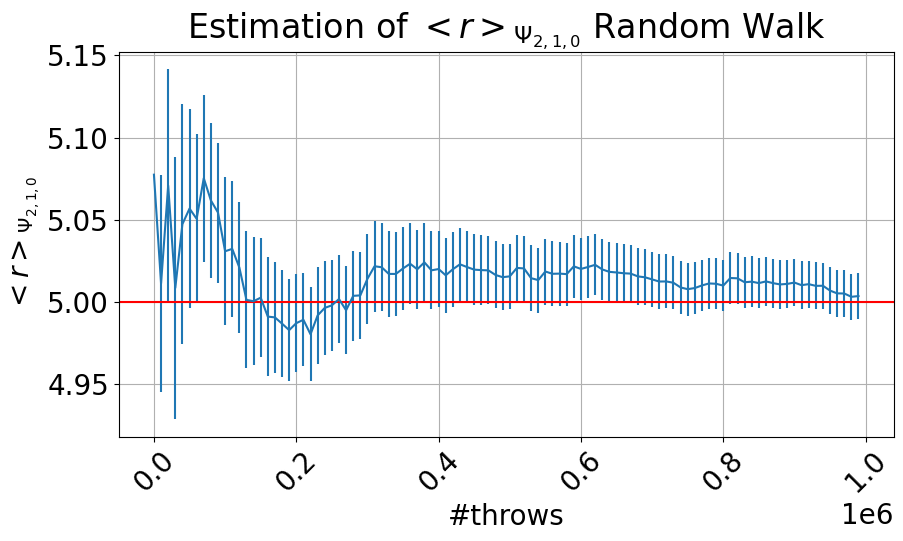

In [135]:
plt.errorbar(x1,dataRW["values210"],yerr=dataRW["err210"])
plt.axhline(y=5, color='r', linestyle='-')
plt.rcParams["figure.figsize"]=(10,5)
plt.title('Estimation of $<r>_{\Psi_{2,1,0}}$ Random Walk')
plt.xticks(rotation = 45)
plt.xlabel('#throws')
plt.ylabel('$<r>_{\Psi_{2,1,0}}$')
plt.grid(True)
plt.show()

## Gaussian Move

In [154]:
dataGauss = pd.read_csv('../Esercizio5/datiGauss.dat', sep='\t', header=None, names=['values100', 'err100', 'values210','err210'])

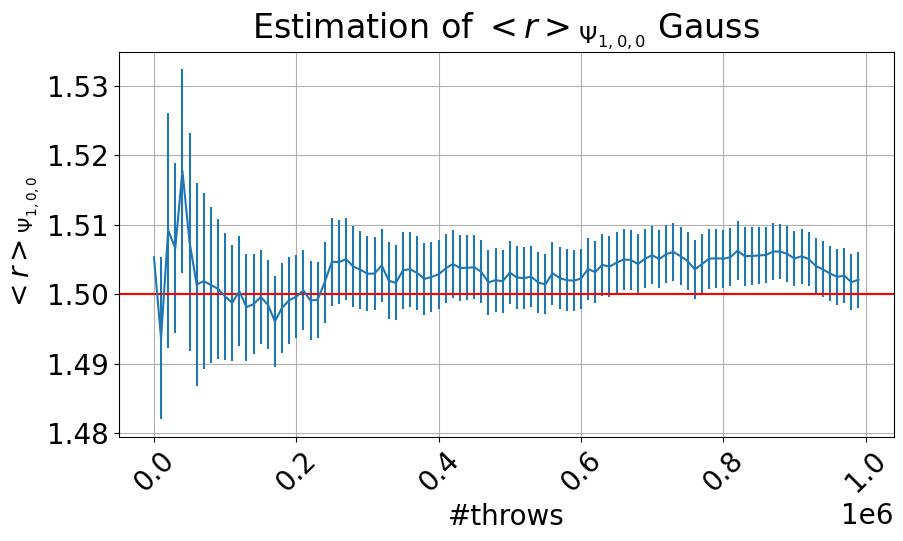

In [158]:
plt.errorbar(x1,dataGauss["values100"],yerr=dataGauss["err100"])
plt.rcParams["figure.figsize"]=(10,5)
plt.axhline(y=1.5, color='r', linestyle='-') # Model value
plt.title('Estimation of $<r>_{\Psi_{1,0,0}}$ Gauss')
plt.xticks(rotation = 45)
plt.xlabel('#throws')
plt.ylabel('$<r>_{\Psi_{1,0,0}}$')
plt.grid(True)
plt.show()

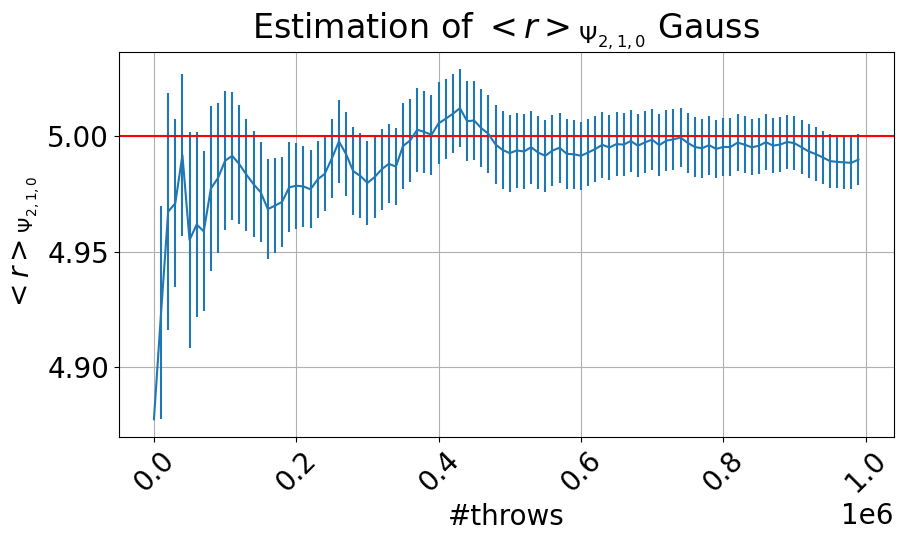

In [159]:
plt.errorbar(x1,dataGauss["values210"],yerr=dataGauss["err210"])
plt.axhline(y=5, color='r', linestyle='-')
plt.rcParams["figure.figsize"]=(10,5)
plt.title('Estimation of $<r>_{\Psi_{2,1,0}}$ Gauss')
plt.xticks(rotation = 45)
plt.xlabel('#throws')
plt.ylabel('$<r>_{\Psi_{2,1,0}}$')
plt.grid(True)
plt.show()

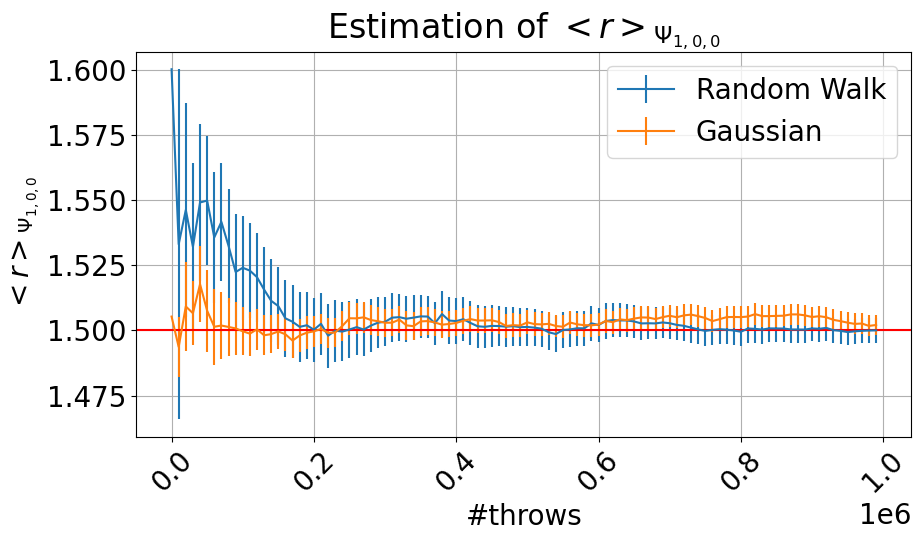

In [160]:
plt.errorbar(x1,dataRW["values100"],yerr=dataRW["err100"], label="Random Walk")
plt.errorbar(x1,dataGauss["values100"],yerr=dataGauss["err100"], label="Gaussian")
plt.rcParams["figure.figsize"]=(10,5)
plt.axhline(y=1.5, color='r', linestyle='-') # Model value
plt.title('Estimation of $<r>_{\Psi_{1,0,0}}$')
plt.xticks(rotation = 45)
plt.xlabel('#throws')
plt.legend(loc="upper right")
plt.ylabel('$<r>_{\Psi_{1,0,0}}$')
plt.grid(True)
plt.show()

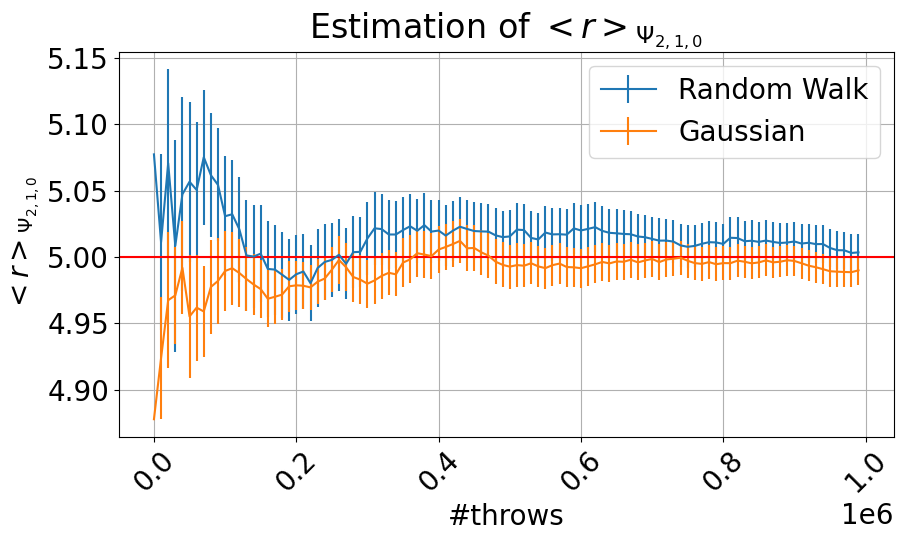

In [138]:
plt.errorbar(x1,dataRW["values210"],yerr=dataRW["err210"], label="Random Walk")
plt.errorbar(x1,dataGauss["values210"],yerr=dataGauss["err210"], label="Gaussian")
plt.rcParams["figure.figsize"]=(10,5)
plt.axhline(y=5, color='r', linestyle='-')
plt.title('Estimation of $<r>_{\Psi_{2,1,0}}$')
plt.xticks(rotation = 45)
plt.xlabel('#throws')
plt.legend(loc="upper right")
plt.ylabel('$<r>_{\Psi_{2,1,0}}$')
plt.grid(True)
plt.show()

## The "goal" of the exercise is to apply the Metropolis algorithm with 50% acceptance for quantum wave function of a hydrogen atom. As we can see the values obtained are statisticly compatible with theorical values.

## In Metropolis algorithm the 50% acceptance ratio is important because:
## 1. Detailed balance and ergodicity: A 50% acceptance ratio is often associated with satisfying detailed balance, allowding the algorithm to achieve ergodicity.
## 2. If is less than 50% most of the moves are being rejected. This can slow exploration, and resulting incefficient sampling and longer simulation times.
## 3. If is higher than 50% most of the move are accepted. This can the system will not explore suffeciently and the mesure will be have high correlation.

## Starting far from a risenable point, the initial positions may have low probabilities according to the wave function. Then the algorithm may require more then the steps you give to explore the region with higher probability. This effect the convergence to a stationary distribution and may take a lot for equilibration period, which is the time for the algorithm to explore the configurational space. In the other hand if the equilibration period is not long enough, the initial position far from the origin may bias the sampling towards certain region of the configuration space.This bias can result inaccurate estimations of observables such as the radius. To avoid this problems we used initial position with hight probabilies. This can help reaching the equilibration process and ensure more efficient sampling of the wave function.

## As we can see if i use multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate the results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are not equivalent.
## The transition probability $T(\vec{x}|\vec{y})$ determines how the Metropolis algorithm explores the configuration space. It defines the probability distribution from which trial moves are generated. In the case of the multivariate normal distribution, that we use, the trial moves have a Gaussian distribution centered around the current position.
## More than that the wave functions $\Psi_{1,0,0}(x,y,z)$ and $\Psi_{2,1,0}(x,y,z)$ have different functional forms and spatial distributions. Their probability densities $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ are not equivalent, and their expectation values for the radius, $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are not the same.
## The Gaussian transition do explore the configuration space more efficiently than a linear transition.

## The number of Monte Carlo Metropolis steps in each block can depending on the specific system, the desired level of accuracy, and the efficiency of the Metropolis algorithm.

## A common approach is to perform a pilot run with a small number of steps and observe the behavior of the observable of interest. If the observable shows signs of convergence and the statistical uncertainties are acceptable, you can use the number of steps from the pilot run as a starting point for determining the number of steps in each block. If the observable is still changing significantly or the statistical uncertainties are large, you may need to increase the number of steps.

## Plot 3D ${\Psi_{1,0,0}}$ Random Walk

In [139]:
data1C = pd.read_csv('../Esercizio5/datiPsi100RW.dat', sep='\s+', header=None, names=['x', 'y', 'z'])
plt.rcParams["figure.figsize"]=(20,10)

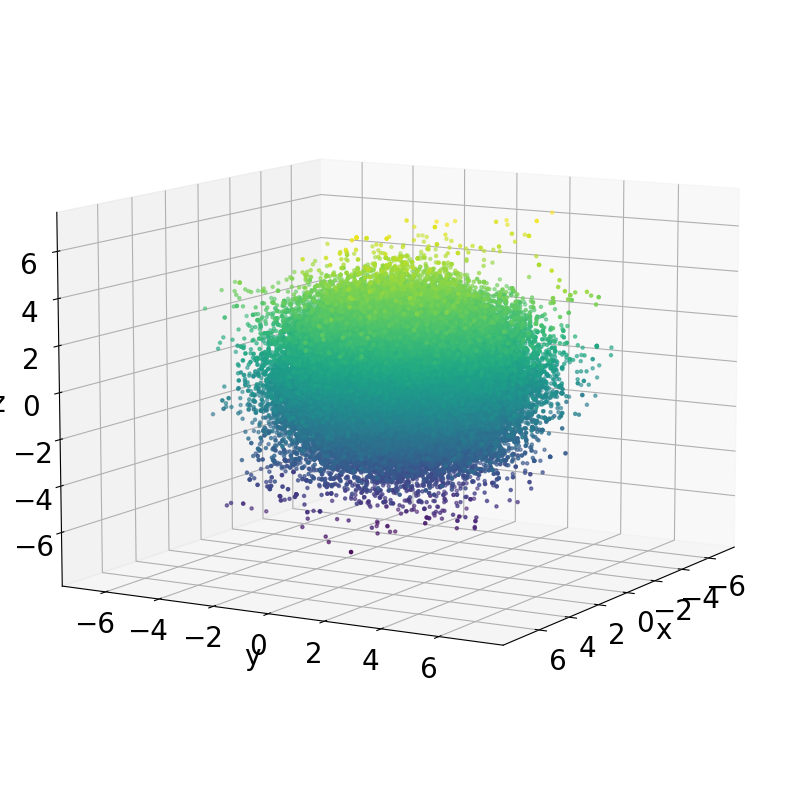

In [140]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data1C['x'], data1C['y'], data1C['z'], c=data1C['z'], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

## Plot 3D ${\Psi_{2,1,0}}$ Random Walk

In [141]:
data2C = pd.read_csv('../Esercizio5/datiPsi210RW.dat', sep='\s+', header=None, names=['x', 'y', 'z'])

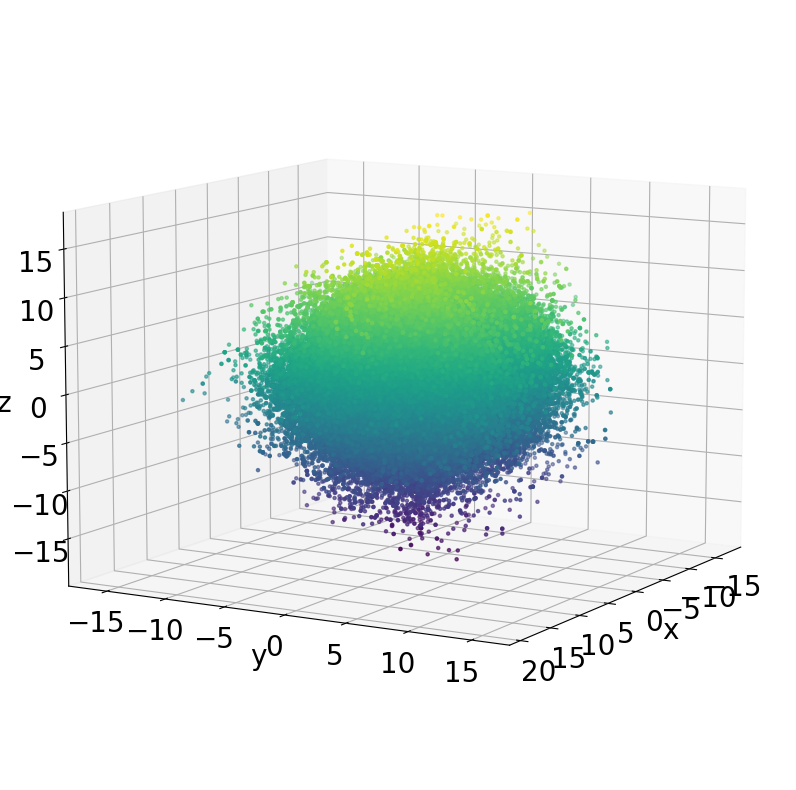

In [142]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data2C['x'], data2C['y'], data2C['z'], c=data2C['z'], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

## Plot 3D ${\Psi_{1,0,0}}$ Gauss

In [143]:
data3C = pd.read_csv('../Esercizio5/datiPsi100Gauss.dat', sep='\s+', header=None, names=['x', 'y', 'z'])

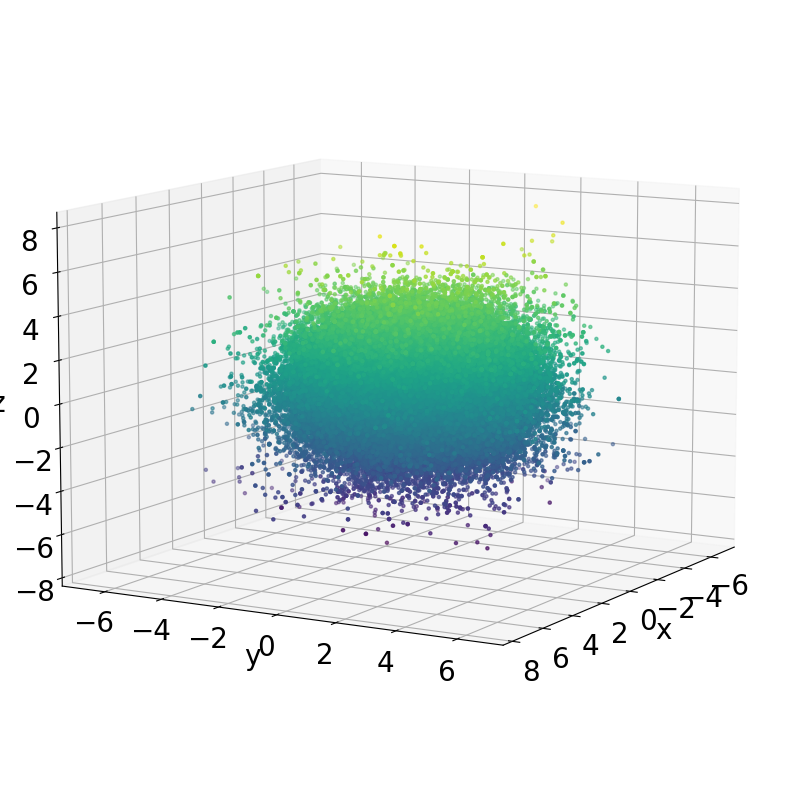

In [144]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data3C['x'], data3C['y'], data3C['z'], c=data3C['z'], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

## Plot 3D ${\Psi_{2,1,0}}$ Gauss

In [145]:
data4C = pd.read_csv('../Esercizio5/datiPsi210Gauss.dat', sep='\s+', header=None, names=['x', 'y', 'z'])

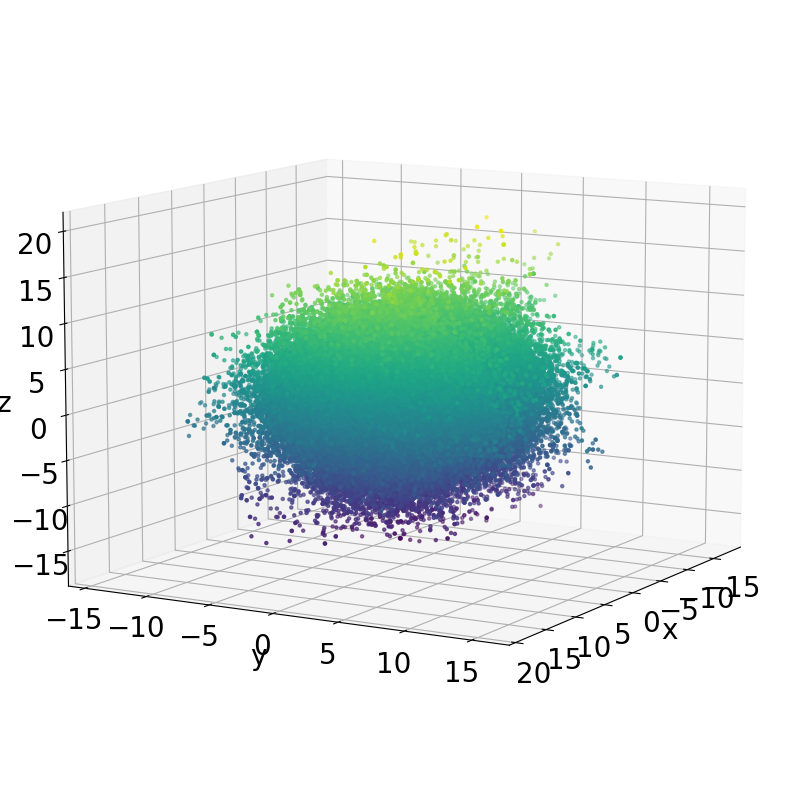

In [146]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data4C['x'], data4C['y'], data4C['z'], c=data4C['z'], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

## Note that the autocorrelation calculation in python script take a little a bit of time

In [147]:
import numpy as np
import matplotlib.pyplot as plt

def autocorrelation(x):
    """Compute autocorrelation"""
    mean = np.mean(x)
    var = np.var(x)
    xp = x - mean
    correlation = np.correlate(xp, xp, mode='full')[-len(x):]
    autocorrelation = correlation / (var * len(x))
    return autocorrelation
plt.rcParams.update({'font.size': 20})

In [148]:
dataInsta = pd.read_csv('../Esercizio5/datiInsta.dat', sep='\s+', header=None, names=['psi100', 'psi210'])

In [149]:
un_values = dataInsta['psi100'].values
# Compute autocorrelation
acf = autocorrelation(un_values)

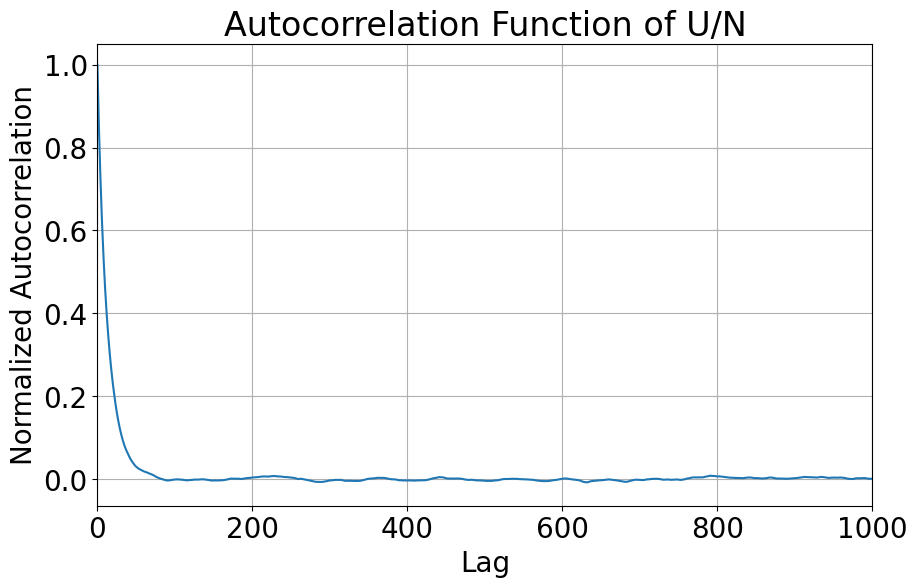

In [150]:
# Plot autocorrelation function
plt.figure(figsize=(10, 6))
plt.plot(acf)
plt.xlabel('Lag')
plt.ylabel('Normalized Autocorrelation')
plt.title('Autocorrelation Function of U/N')
plt.xlim(0,1000)
plt.grid(True)
plt.show()

## In case of ${\Psi_{1,0,0}}$ the block size is approssimatly 100

In [151]:
un_values2 = dataInsta['psi210'].values
# Compute autocorrelation
acf2 = autocorrelation(un_values2)

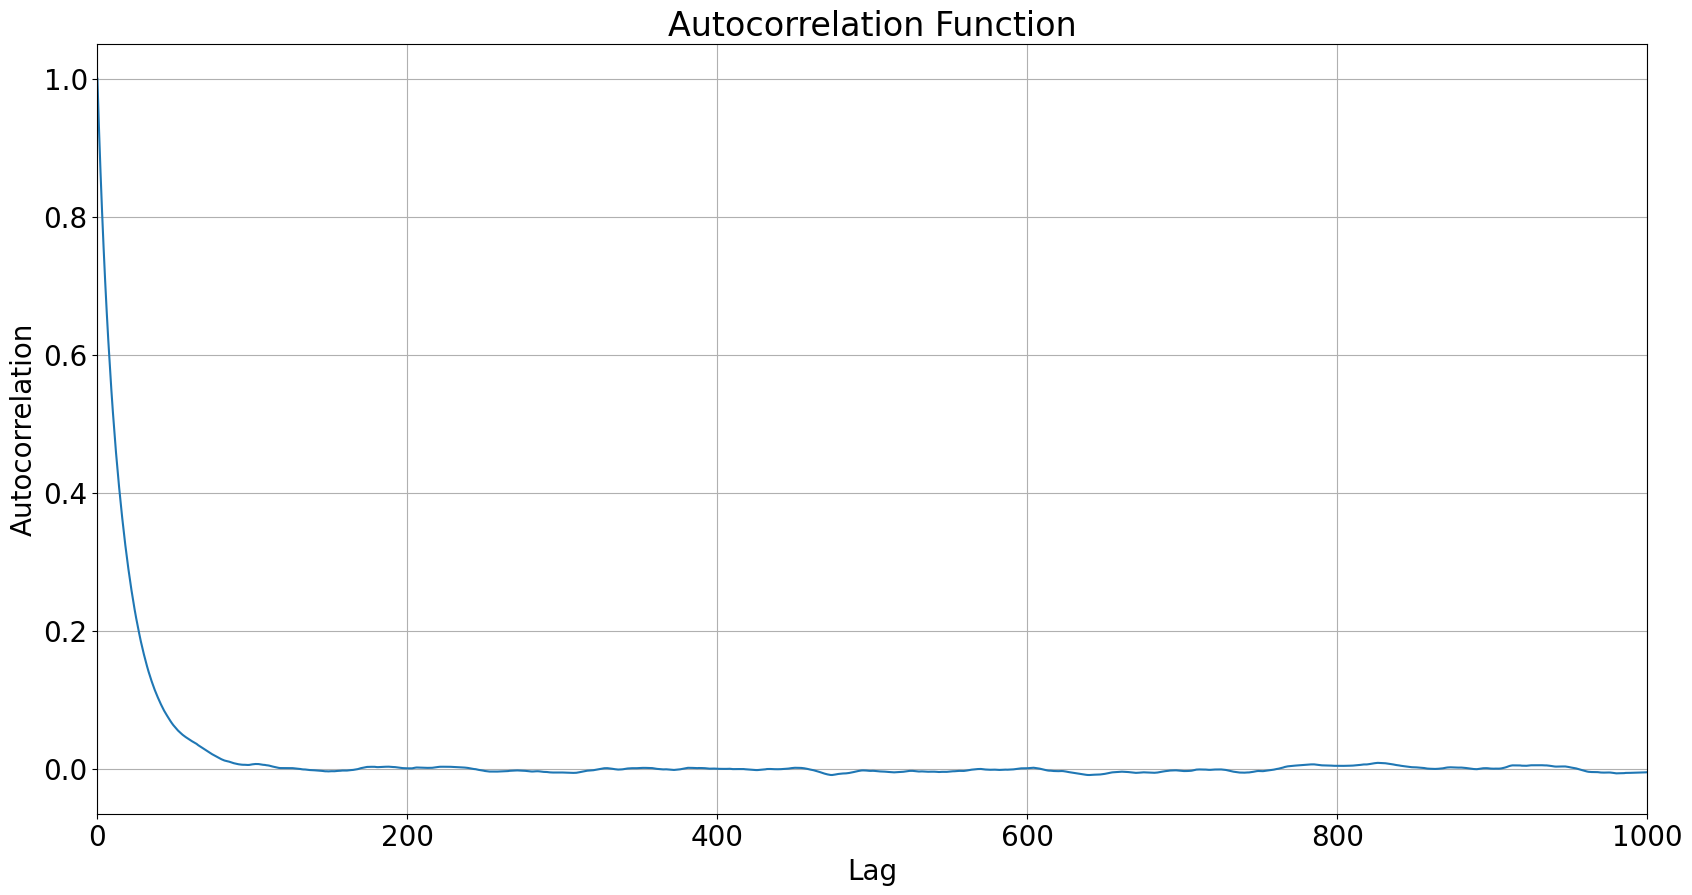

In [152]:
# Plot autocorrelation function
plt.plot(acf2)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.xlim(0,1000)
plt.grid(True)
plt.show()

## In case of ${\Psi_{2,1,0}}$ the block size is approssimatly 100

In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1:


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>